In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Image librarie
from PIL import Image

# Filesystem
import json

# Other
import random
import os

print(tf.__version__)

env = open('env.json','r')
env = json.load(env)

/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages

1.13.1


### Load all images

In [21]:
img_directory = "../../dataset/"

def list_files_from_directory(directory = "./", extension = "jpg"):
    return list(f for f in os.listdir(directory) if f.endswith('.' + extension))

def load_images(nb_images = -1, vue_of_image = "SEC", img_directory = "./"):
    #On recupere la liste des chemins vers les images du dataset originale
    img_list = list_files_from_directory(directory = img_directory)
    random.shuffle(img_list)
    
    nb_original_img = len(img_list)
    if nb_images == -1:
        nb_images = nb_original_img
    
    #On itere sur toutes les images pour les chargers dans le dataset
    train_dataset = []
    train_labels = []
    test_dataset = []
    test_labels = []
    
    i = 0
    nb_ACI = 0
    nb_WED = 0
    nb_WHE = 0
    nb_autre = 0
    
    for img_path in img_list:
        test_or_train = random.random()
        add_image = False
        type_img = img_path.split("_")[0]
        vue = img_path.split("_")[1]
        if vue == vue_of_image:
            if type_img == "IIIb":
                label = 0
                add_image = True
                nb_ACI += 1
            elif type_img == "IIb":
                label = 1
                add_image = True 
                nb_WED += 1
            elif type_img == "Ia":
                label = 2
                add_image = True
                nb_WHE += 1
            else:
                label = 3
                add_image = True
                nb_autre += 1
        if add_image:
            i += 1
            img = np.array(Image.open(img_directory + img_path).resize((500, 500)))
            if test_or_train <= 0.6:
                train_dataset.append(img)
                train_labels.append(label)
            else:
                test_dataset.append(img)
                test_labels.append(label)
        if i >= nb_images:
            break
        
    print("IIIb : " + str(nb_ACI) + " IIb : " + str(nb_WED) + " Ia : " + str(nb_WHE) + " Autre : " + str(nb_autre))
    return np.array(train_dataset), np.array(train_labels), np.array(test_dataset), np.array(test_labels)

type_of_vue = "SUR"
(train_images, train_labels, test_images, test_labels) = load_images(-1, img_directory = img_directory, vue_of_image = type_of_vue)

IIIb : 17 IIb : 22 Ia : 29 Autre : 0


In [22]:
class_names = ['IIIb', 'IIb', 'Ia', 'Autre']
train_images.shape

(35, 500, 500, 3)

In [23]:
len(train_labels)

35

In [24]:
train_labels

array([2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2,
       0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1])

In [25]:
test_images.shape

(33, 500, 500, 3)

In [26]:
len(test_labels)

33

### Preprocess

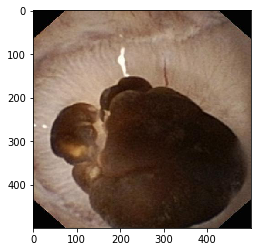

In [27]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)

In [28]:
for img in train_images:
    for px in img:
        px = px / 255.0

for img in test_images:
    for px in img:
        px = px / 255.0

print("Training set :", train_images.shape)
print("Test set :", test_images.shape)

Training set : (35, 500, 500, 3)
Test set : (33, 500, 500, 3)


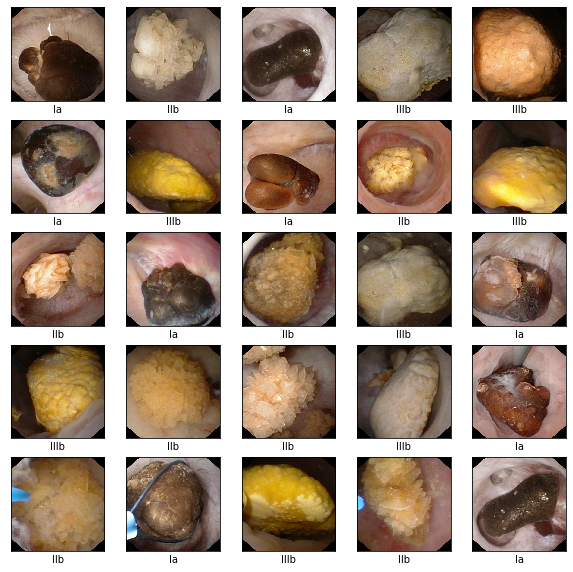

In [29]:
plt.figure(figsize=(10,10))
for i in range(min(25, len(train_images))):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model

In [12]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
for layer in model.layers:
    print(layer, layer.input_shape)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f314a363b90> (None, None, None, 3)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f314a3bed10> (None, None, None, 3)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f314dd312d0> (None, None, None, 64)
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f314dc57210> (None, None, None, 64)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f314de9c0d0> (None, None, None, 64)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f314857ca10> (None, None, None, 128)
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f314853a810> (None, None, None, 128)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f314853ab50> (None, None, None, 128)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f31484e5f10> (None, None, None, 256)
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f314849dc90>

In [17]:
model.layers[1].kernel_size

(3, 3)

In [33]:
train_images = tf.cast(train_images, tf.float32)/255.0

In [36]:
training_features = model(train_images) # USE NUMPYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [37]:
sess = tf.Session()
sess.run(training_features)

FailedPreconditionError: Error while reading resource variable block5_conv3/bias from Container: localhost. This could mean that the variable was uninitialized. Not found: Container localhost does not exist. (Could not find resource: localhost/block5_conv3/bias)
	 [[node vgg16_3/block5_conv3/BiasAdd/ReadVariableOp (defined at <ipython-input-36-61f286845e7e>:1) ]]

Caused by op 'vgg16_3/block5_conv3/BiasAdd/ReadVariableOp', defined at:
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-61f286845e7e>", line 1, in <module>
    training_features = model(train_images)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py", line 554, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py", line 815, in call
    mask=masks)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py", line 1002, in _run_internal_graph
    output_tensors = layer.call(computed_tensor, **kwargs)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/keras/layers/convolutional.py", line 218, in call
    outputs = nn.bias_add(outputs, self.bias, data_format='NHWC')
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/ops/nn_ops.py", line 1979, in bias_add
    bias = ops.convert_to_tensor(bias, dtype=value.dtype, name="bias")
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1039, in convert_to_tensor
    return convert_to_tensor_v2(value, dtype, preferred_dtype, name)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1097, in convert_to_tensor_v2
    as_ref=False)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1175, in internal_convert_to_tensor
    ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 1222, in _dense_var_to_tensor
    return var._dense_var_to_tensor(dtype=dtype, name=name, as_ref=as_ref)  # pylint: disable=protected-access
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 1177, in _dense_var_to_tensor
    return self.value()
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 644, in value
    return self._read_variable_op()
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 728, in _read_variable_op
    self._dtype)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/ops/gen_resource_variable_ops.py", line 550, in read_variable_op
    "ReadVariableOp", resource=resource, dtype=dtype, name=name)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/jpc/anaconda3/envs/codev/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Error while reading resource variable block5_conv3/bias from Container: localhost. This could mean that the variable was uninitialized. Not found: Container localhost does not exist. (Could not find resource: localhost/block5_conv3/bias)
	 [[node vgg16_3/block5_conv3/BiasAdd/ReadVariableOp (defined at <ipython-input-36-61f286845e7e>:1) ]]
